## Naive Bayes Classification
Avinash Navlani, Armando Fandango, Ivan Idris, Python Data Analysis, Third Edition, 2021

In [24]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
   
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label
 
# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train,feature_test, target_train, target_test = \
train_test_split(features, target, test_size=0.3, random_state=1)

In [26]:
# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Classifier
model = GaussianNB()
 
# Train the model using the training sets
model.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = model.predict(feature_test)

In [27]:
# Import metrics module for performance evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
 
# Calculate model accuracy
print("Accuracy:",accuracy_score(target_test, predictions))
# Calculate model precision
print("Precision:",precision_score(target_test, predictions))
# Calculate model recall
print("Recall:",recall_score(target_test, predictions))
# Calculate model f1 score
print("F1-Score:",f1_score(target_test, predictions))

Accuracy: 0.7748917748917749
Precision: 0.7391304347826086
Recall: 0.6
F1-Score: 0.6623376623376623


## Confusion Matrix

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


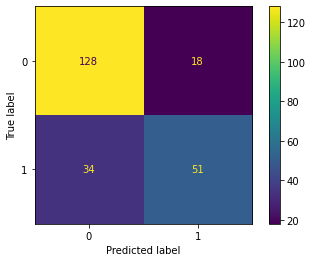

In [28]:
# Import the confusion matrix
from sklearn.metrics import plot_confusion_matrix

# Plot Confusion matrix
plot_confusion_matrix(model , feature_test, target_test, values_format='d')

## Confusion Report

In [29]:
# import classification report
from sklearn.metrics import classification_report

# Create classification report
print(classification_report(target_test, predictions, target_names=['Yes(1)','No(0)']))

              precision    recall  f1-score   support

      Yes(1)       0.79      0.88      0.83       146
       No(0)       0.74      0.60      0.66        85

    accuracy                           0.77       231
   macro avg       0.76      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



## ROC Curve and AUC
https://zh.wikipedia.org/wiki/ROC%E6%9B%B2%E7%BA%BF

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


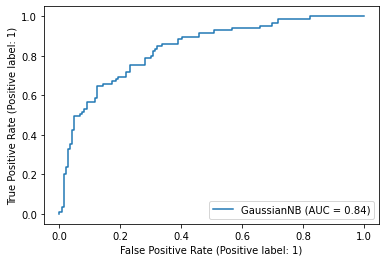

In [35]:
# import plot_roc_curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(model, feature_test, target_test)
#plot_roc_curve(model, target_test, predictions)

In [31]:
# import roc auc score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Compute the area under ROC curve
auc = roc_auc_score(target_test, predictions)

# Print auc value
print("Area Under Curve:",auc)

Area Under Curve: 0.7383561643835617


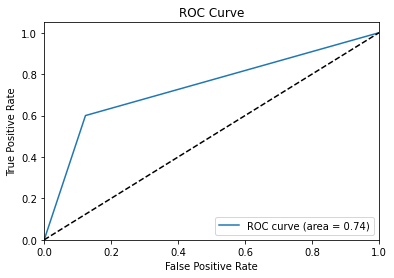

In [37]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr,tpr,_=roc_curve(target_test,predictions)
roc_auc=auc(fpr,tpr)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
